# Dropout 실습

이번 실습에서는 **Dropout** 이 Overfitting 완화에 어떻게 도움이 되는지 체감해봅니다.

- 작은 데이터셋과 복잡한 모델로 Overfitting 유도
- Dropout 유무 비교
- Validation Loss/Accuracy 곡선으로 비교

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 준비 (작은 데이터셋 → Overfitting 유도)

In [13]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Dropout 없는 모델과 Dropout 적용 모델 정의

In [14]:
def build_model_with_dropout():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_model_without_dropout():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## 3. 모델 학습 (Dropout 유무 비교)

In [15]:
model_no_dropout = build_model_without_dropout()
model_with_dropout = build_model_with_dropout()

history_no_dropout = model_no_dropout.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200, batch_size=16, verbose=0
)

history_with_dropout = model_with_dropout.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200, batch_size=16, verbose=0
)

## 4. 결과 시각화 (Loss & Accuracy)

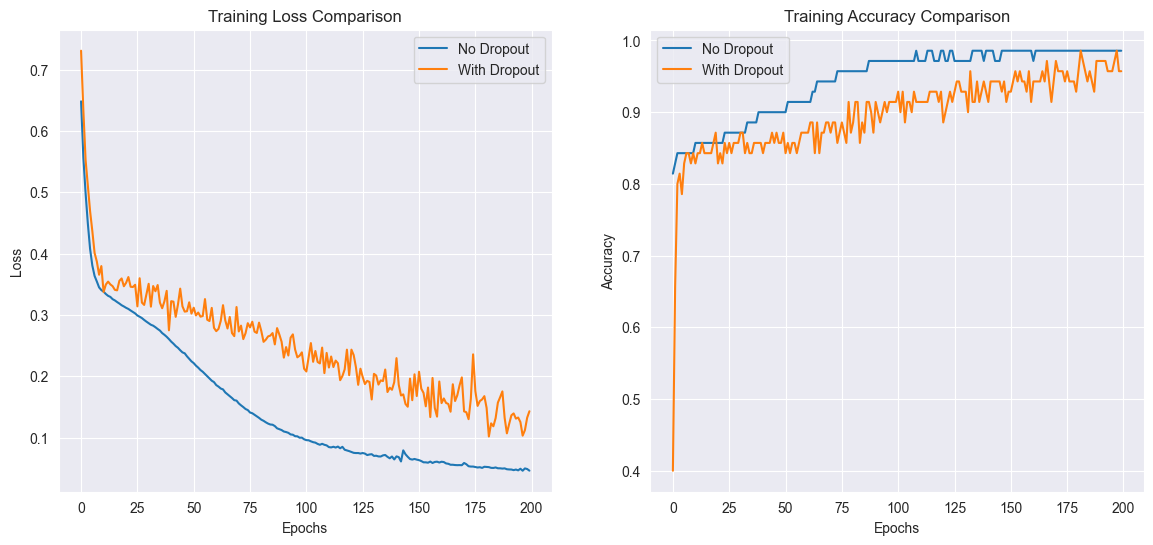

In [16]:
plt.figure(figsize=(14,6))

# Loss 비교
plt.subplot(1,2,1)
plt.plot(history_no_dropout.history["loss"], label="No Dropout")
plt.plot(history_with_dropout.history["loss"], label="With Dropout")
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy 비교
plt.subplot(1,2,2)
plt.plot(history_no_dropout.history["accuracy"], label="No Dropout")
plt.plot(history_with_dropout.history["accuracy"], label="With Dropout")
plt.title("Training Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

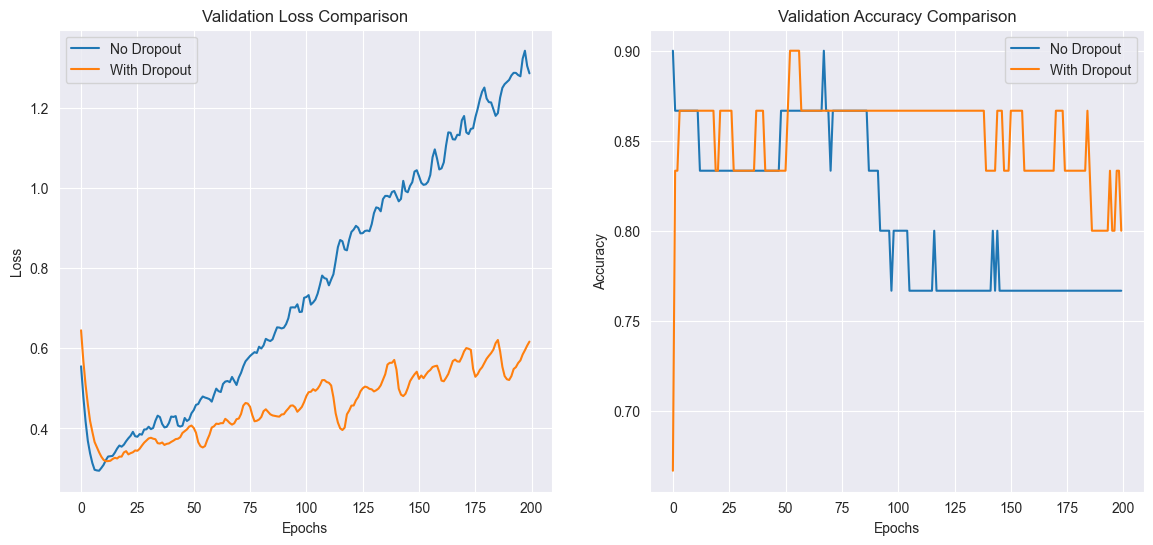

In [17]:
plt.figure(figsize=(14,6))

# Loss 비교
plt.subplot(1,2,1)
plt.plot(history_no_dropout.history["val_loss"], label="No Dropout")
plt.plot(history_with_dropout.history["val_loss"], label="With Dropout")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy 비교
plt.subplot(1,2,2)
plt.plot(history_no_dropout.history["val_accuracy"], label="No Dropout")
plt.plot(history_with_dropout.history["val_accuracy"], label="With Dropout")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()